In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
pd.set_option('display.max_columns', None)

In [9]:
solar = pd.read_csv('../data/threshold_90percentile/ca_data_version_17.csv')
#solar.drop(columns='Unnamed: 0', index=1, inplace = True)

In [10]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,"JMJJ+R4 Columbia, Redding, CA, USA",1.0,1.0,185.0,NaN,5.573046,"[93473.66454398488, 78248.05013653943, 124645....","[117.3458680717152, 99.39957511771797, 162.198...","[3.785350582958554, 3.549984825632785, 5.23220...","[98052.30037706059, 82286.97517169513, 130677....",1.506568e+06,13.5433
1,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,"6759 Airport Rd, Redding, CA 96002, USA",1.0,0.0,149.0,NaN,5.522022,"[74592.6287811629, 83370.48168344896, 130088.9...","[93.63007508626477, 105.692206308516, 169.3173...","[3.020325002782735, 3.774721653875571, 5.46184...","[78508.67122917825, 87613.00205050594, 136325....",1.490699e+06,14.0202
2,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,"7PCC+W7 Napa, CA, USA",1.0,1.0,9.0,NaN,5.622299,"[92126.2550424327, 89064.40533523557, 128839.5...","[112.333561105272, 111.1445319302946, 165.0815...","[3.623663261460389, 3.969447568939093, 5.32521...","[96676.26859564037, 93532.47717835204, 135056....",1.573588e+06,6.6744
3,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,"6WJ4+QW Fairfield, CA, USA",1.0,0.0,10.0,NaN,5.836747,"[95636.588127896, 114983.9387991452, 140340.06...","[116.0314314180241, 143.7299506017422, 177.809...","[3.742949400581423, 5.133212521490793, 5.73580...","[100311.9908810605, 120432.7997151909, 147046....",1.650112e+06,8.4137
4,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,"P3GR+8Q Dublin, CA, USA",1.0,2.0,117.0,NaN,5.903124,"[90133.33737603408, 113757.4022359532, 148714....","[111.0064981450139, 141.8326228652107, 188.570...","[3.580854778871415, 5.065450816614666, 6.08292...","[94625.84469786189, 119241.6885916102, 155706....",1.669385e+06,8.5320


In [11]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [12]:
solar.isnull().sum()

Latitude                0
Longitude               0
Solar_farm_present      0
State                   0
panel.area            300
power                 349
panels                300
landscape.area        300
water                 300
urban                 300
Address               300
land_cover              0
slope                   0
elevation               0
feature_violated      203
solrad_annual           0
ac_monthly              0
poa_monthly             0
solrad_monthly          0
dc_monthly              0
ac_annual               0
min_distance            2
dtype: int64

In [13]:
solar = solar[solar['Solar_farm_present'].notnull()]

In [14]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,"JMJJ+R4 Columbia, Redding, CA, USA",1.0,1.0,185.0,NaN,5.573046,"[93473.66454398488, 78248.05013653943, 124645....","[117.3458680717152, 99.39957511771797, 162.198...","[3.785350582958554, 3.549984825632785, 5.23220...","[98052.30037706059, 82286.97517169513, 130677....",1.506568e+06,13.5433
1,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,"6759 Airport Rd, Redding, CA 96002, USA",1.0,0.0,149.0,NaN,5.522022,"[74592.6287811629, 83370.48168344896, 130088.9...","[93.63007508626477, 105.692206308516, 169.3173...","[3.020325002782735, 3.774721653875571, 5.46184...","[78508.67122917825, 87613.00205050594, 136325....",1.490699e+06,14.0202
2,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,"7PCC+W7 Napa, CA, USA",1.0,1.0,9.0,NaN,5.622299,"[92126.2550424327, 89064.40533523557, 128839.5...","[112.333561105272, 111.1445319302946, 165.0815...","[3.623663261460389, 3.969447568939093, 5.32521...","[96676.26859564037, 93532.47717835204, 135056....",1.573588e+06,6.6744
3,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,"6WJ4+QW Fairfield, CA, USA",1.0,0.0,10.0,NaN,5.836747,"[95636.588127896, 114983.9387991452, 140340.06...","[116.0314314180241, 143.7299506017422, 177.809...","[3.742949400581423, 5.133212521490793, 5.73580...","[100311.9908810605, 120432.7997151909, 147046....",1.650112e+06,8.4137
4,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,"P3GR+8Q Dublin, CA, USA",1.0,2.0,117.0,NaN,5.903124,"[90133.33737603408, 113757.4022359532, 148714....","[111.0064981450139, 141.8326228652107, 188.570...","[3.580854778871415, 5.065450816614666, 6.08292...","[94625.84469786189, 119241.6885916102, 155706....",1.669385e+06,8.5320


In [15]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [16]:
solar_existing = solar[solar['Solar_farm_present']==1]
solar_non_existing = solar[solar['Solar_farm_present']==0]

In [17]:
solar_non_existing_sample = solar_non_existing.sample(300, random_state = 42)

In [18]:
solar_non_existing_sample

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
406,41.982314,-120.135763,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,2234.0,slope,5.403188,"[75889.385831666, 75660.72796371364, 125832.60...","[89.62291710910237, 90.79423027830299, 157.788...","[2.891061842229109, 3.242651081367964, 5.08996...","[80121.8190328541, 80814.14378972977, 135475.6...",1.559123e+06,337.8952
469,35.568565,-117.719636,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,837.0,min_distance,6.780614,"[143128.6642678969, 141792.7034857274, 175137....","[176.5420577806699, 177.1917822956211, 225.270...","[5.694905089699028, 6.328277939129324, 7.26680...","[150037.8985448845, 149050.2810087697, 183497....",1.891564e+06,127.4448
355,40.633080,-121.947857,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,506.0,ac_annual,5.479388,"[76662.32697343129, 87168.1917744688, 122378.8...","[94.81663404434752, 110.6431991703206, 157.319...","[3.058601098204759, 3.951542827511451, 5.07481...","[80616.13894925267, 91552.87580856998, 128419....",1.500956e+06,44.1894
212,38.970981,-122.551889,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.0,454.0,slope,5.836002,"[99155.14412090452, 116838.4554851841, 137740....","[120.9767701834185, 145.480714197786, 173.7457...","[3.902476457529628, 5.19573979277807, 5.604700...","[103945.4043898903, 122429.9757936439, 144293....",1.619459e+06,96.2380
436,41.825881,-121.365398,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1230.0,elevation,5.647683,"[94876.33203025335, 110576.7093757646, 132185....","[112.7696357890814, 135.5576593297461, 163.040...","[3.637730186744562, 4.841344976062362, 5.25938...","[99607.73233129023, 116733.3562719491, 138867....",1.607777e+06,256.2966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,37.993275,-122.400881,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.558585,"[87650.26012124785, 107906.2443225847, 137338....","[106.6882922412261, 135.4824142729092, 173.277...","[3.441557814233099, 4.838657652603898, 5.58959...","[92031.73026880398, 113088.420568366, 143854.2...",1.578639e+06,6.2392
274,36.272513,-116.856734,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,-84.0,min_distance,6.583255,"[129856.0816067565, 137824.6508877099, 163988....","[165.5886587405301, 175.5532809719579, 215.182...","[5.341569636791293, 6.269760034712784, 6.94137...","[135901.563270017, 144084.2567611463, 171777.8...",1.786337e+06,433.2520
309,35.099266,-114.807341,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,712.0,min_distance,6.521609,"[132258.1944639824, 139287.0587934147, 166681....","[161.8129853102928, 171.9357380539023, 213.146...","[5.219773719686866, 6.140562073353652, 6.87570...","[139040.5193605026, 146285.3170228653, 174752....",1.823788e+06,311.7247
473,35.822768,-115.734961,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,822.0,min_distance,6.486042,"[129052.2731941294, 133567.255045289, 163710.6...","[158.7180222205354, 167.1311364632515, 209.498...","[5.119936200662432, 5.968969159401838, 6.75800...","[135407.4083775444, 140681.3642197368, 171614....",1.813296e+06,426.9589


In [19]:
solar = pd.concat([solar_existing, solar_non_existing_sample])

In [20]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [21]:
solar.to_csv('ca_data_version_17.csv', index = False)

In [22]:
solar.columns

Index(['Latitude', 'Longitude', 'Solar_farm_present', 'State', 'panel.area',
       'power', 'panels', 'landscape.area', 'water', 'urban', 'Address',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

In [23]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [24]:
columns_ML = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[columns_ML]
y = solar['Solar_farm_present']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )

In [27]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000
mean,0.885572,3.002488,591.753731,6.215813,1.731165e+06,128.232807
std,0.318727,6.402734,547.244817,0.511373,1.332403e+05,122.489289
min,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,2.246300
25%,1.000000,0.000000,115.500000,5.852871,1.638101e+06,26.992275
50%,1.000000,1.000000,531.000000,6.398478,1.763596e+06,81.742650
75%,1.000000,2.000000,889.500000,6.640551,1.844784e+06,200.778100
max,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [28]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,101.000000,101.00000,101.000000,101.000000,1.010000e+02,101.000000
mean,0.811881,2.19802,488.930693,6.197311,1.727254e+06,106.417086
std,0.392756,5.36660,498.097727,0.538546,1.382798e+05,120.870048
min,0.000000,0.00000,-16.000000,4.585775,1.342816e+06,0.139700
25%,1.000000,0.00000,42.000000,5.753522,1.617156e+06,20.649200
50%,1.000000,1.00000,372.000000,6.521609,1.783410e+06,44.747500
75%,1.000000,2.00000,818.000000,6.641066,1.844989e+06,153.459500
max,1.000000,36.00000,2629.000000,6.865475,1.930086e+06,542.595500


In [29]:
sd = StandardScaler()

In [30]:
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
X_train_excluding_LC = pd.DataFrame(sd.fit_transform(X_train_excluding_LC), columns = columns_ML_excluding_LC)

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
X_test_excluding_LC = pd.DataFrame(sd.fit_transform(X_test_excluding_LC), columns = columns_ML_excluding_LC)

In [31]:
X_train_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02
mean,1.237263e-16,1.767519e-17,3.093159e-17,4.672879e-16,5.501404e-16
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00
min,-2.781929e+00,-4.695227e-01,-1.236368e+00,-3.601121e+00,-3.390386e+00
25%,3.594628e-01,-4.695227e-01,-8.713599e-01,-7.106238e-01,-6.993344e-01
50%,3.594628e-01,-3.131448e-01,-1.111558e-01,3.576495e-01,2.437086e-01
75%,3.594628e-01,-1.567669e-01,5.447604e-01,8.316181e-01,8.537986e-01
max,3.594628e-01,5.160082e+00,4.647667e+00,1.380192e+00,1.536974e+00


In [32]:
X_test_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
mean,-1.198161e-16,-5.441192e-17,1.202284e-19,-1.382832e-15,6.705307e-16
std,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00
min,-2.077448e+00,-4.116168e-01,-1.018774e+00,-3.007309e+00,-2.794013e+00
25%,4.813599e-01,-4.116168e-01,-9.017503e-01,-8.281614e-01,-8.001732e-01
50%,4.813599e-01,-2.243497e-01,-2.359254e-01,6.051755e-01,4.081312e-01
75%,4.813599e-01,-3.708259e-02,6.639471e-01,8.280961e-01,8.556726e-01
max,4.813599e-01,6.329998e+00,4.317914e+00,1.246869e+00,1.474135e+00


In [33]:
X_train = pd.concat([X_train_excluding_LC, X_train['land_cover']], axis=1)
X_test = pd.concat([X_test_excluding_LC, X_test['land_cover']], axis=1)

In [34]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,402.000000
mean,1.237263e-16,1.767519e-17,3.093159e-17,4.672879e-16,5.501404e-16,128.232807
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,122.489289
min,-2.781929e+00,-4.695227e-01,-1.236368e+00,-3.601121e+00,-3.390386e+00,2.246300
25%,3.594628e-01,-4.695227e-01,-8.713599e-01,-7.106238e-01,-6.993344e-01,26.992275
50%,3.594628e-01,-3.131448e-01,-1.111558e-01,3.576495e-01,2.437086e-01,81.742650
75%,3.594628e-01,-1.567669e-01,5.447604e-01,8.316181e-01,8.537986e-01,200.778100
max,3.594628e-01,5.160082e+00,4.647667e+00,1.380192e+00,1.536974e+00,553.429200


In [35]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,101.000000
mean,-1.198161e-16,-5.441192e-17,1.202284e-19,-1.382832e-15,6.705307e-16,106.417086
std,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,120.870048
min,-2.077448e+00,-4.116168e-01,-1.018774e+00,-3.007309e+00,-2.794013e+00,0.139700
25%,4.813599e-01,-4.116168e-01,-9.017503e-01,-8.281614e-01,-8.001732e-01,20.649200
50%,4.813599e-01,-2.243497e-01,-2.359254e-01,6.051755e-01,4.081312e-01,44.747500
75%,4.813599e-01,-3.708259e-02,6.639471e-01,8.280961e-01,8.556726e-01,153.459500
max,4.813599e-01,6.329998e+00,4.317914e+00,1.246869e+00,1.474135e+00,542.595500


# Logistic Regression:

In [36]:
params = {"C": np.logspace(-1, 1, 100),
          "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression(max_iter=3000, random_state=104)   
lr_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=104),
             n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.278...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [37]:
lr_tuned = LogisticRegression(**lr_cv.best_params_, max_iter=3000, random_state=104)
lr_tuned.fit(X_train, y_train)
y_pred_train_lr = lr_tuned.predict(X_train) 
y_pred_test_lr = lr_tuned.predict(X_test)

/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


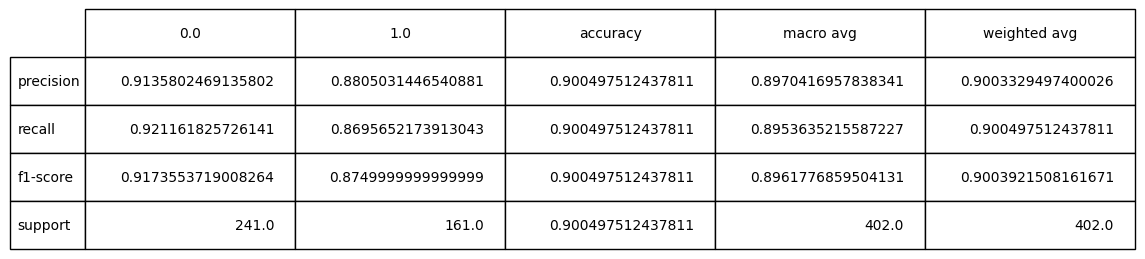

In [38]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

In [39]:
def plot_confusion_matrix(y_true, y_pred):
    
    figsize = (10, 10)
    fig, ax = plt.subplots(figsize=figsize)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           #xticks=np.arange(n_classes),
           #yticks=np.arange(n_classes),
           #xticklabels=labels,
           #yticklabels=labels
          )

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=15)
        

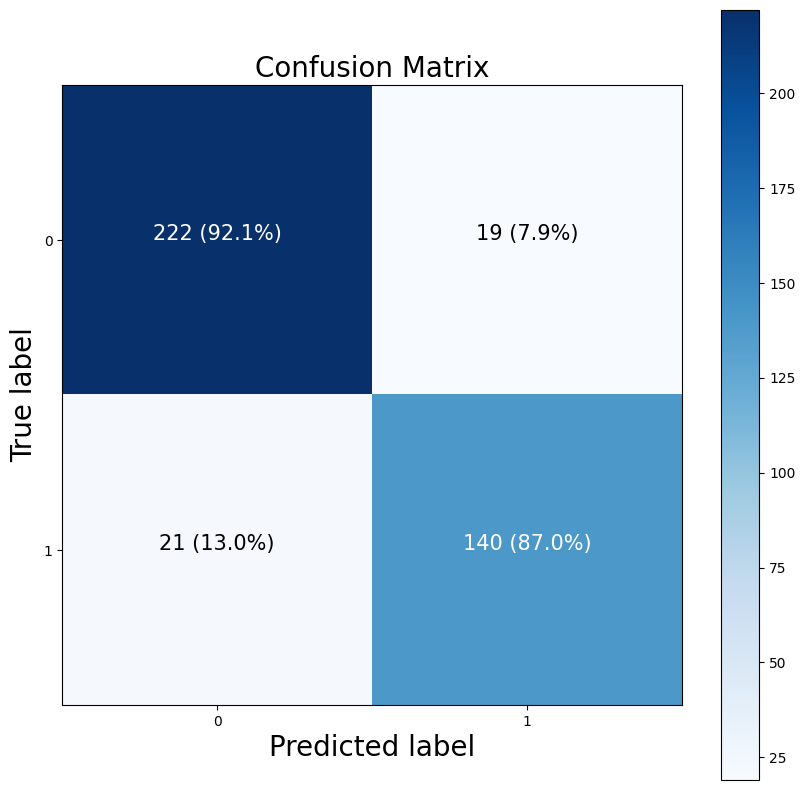

In [40]:
plot_confusion_matrix(y_train, y_pred_train_lr)

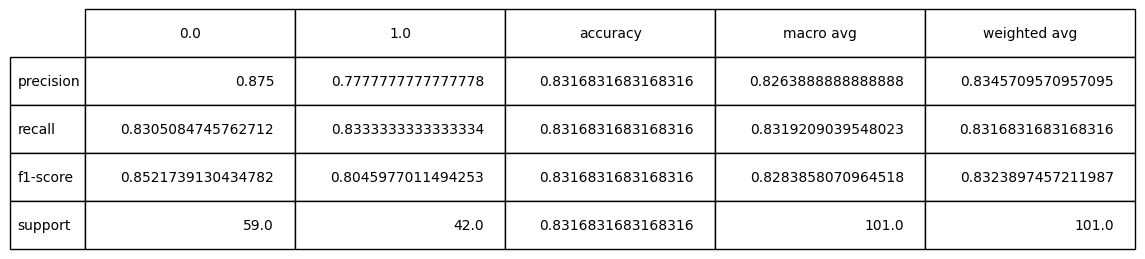

In [41]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

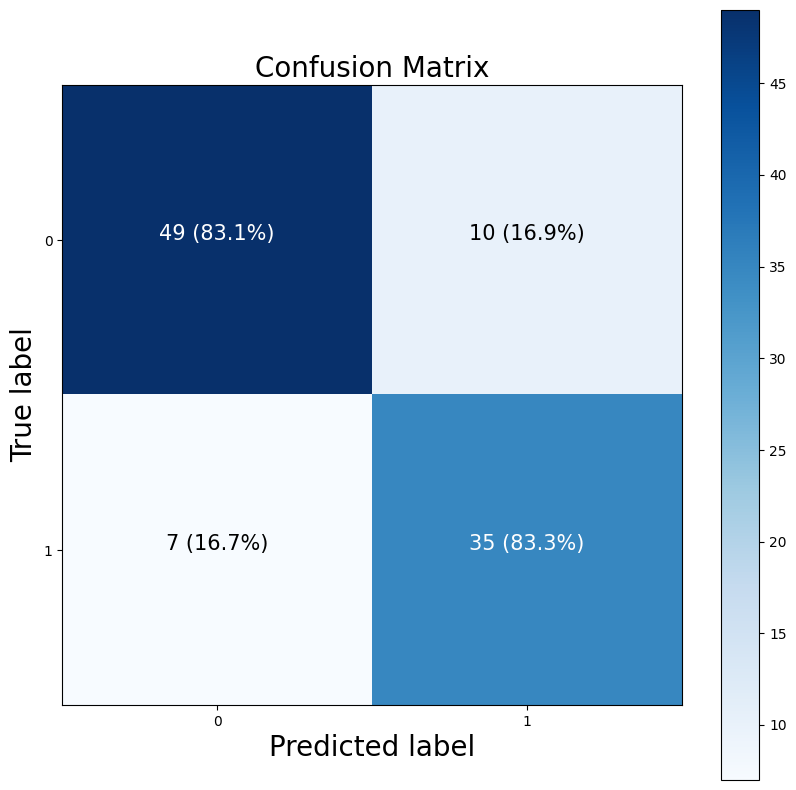

In [42]:
plot_confusion_matrix(y_test, y_pred_test_lr)

# K Nearest-Neighbors Classifier:

In [43]:
knn = KNeighborsClassifier(n_neighbors=8)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 101)

accuracy_average=0

for train_idx, val_idx in kfold.split(X_train):

    X_train_train, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_train, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    knn.fit(X_train_train, y_train_train)

    y_pred = knn.predict(X_val) 
    accuracy_average += accuracy_score(y_val, y_pred)/5

In [44]:
y_pred_train_knn = knn.predict(X_train)

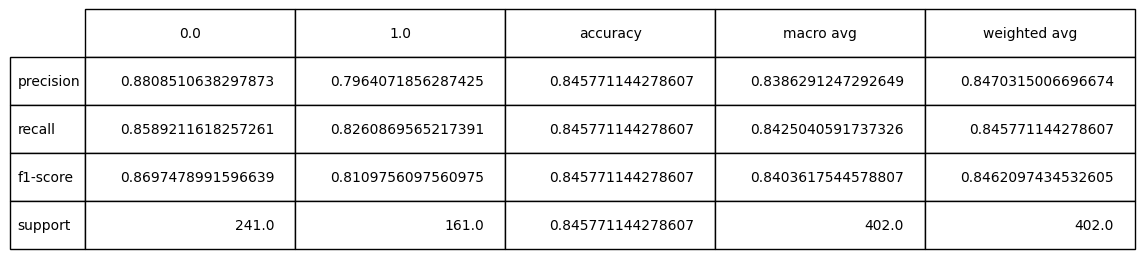

In [45]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_knn, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

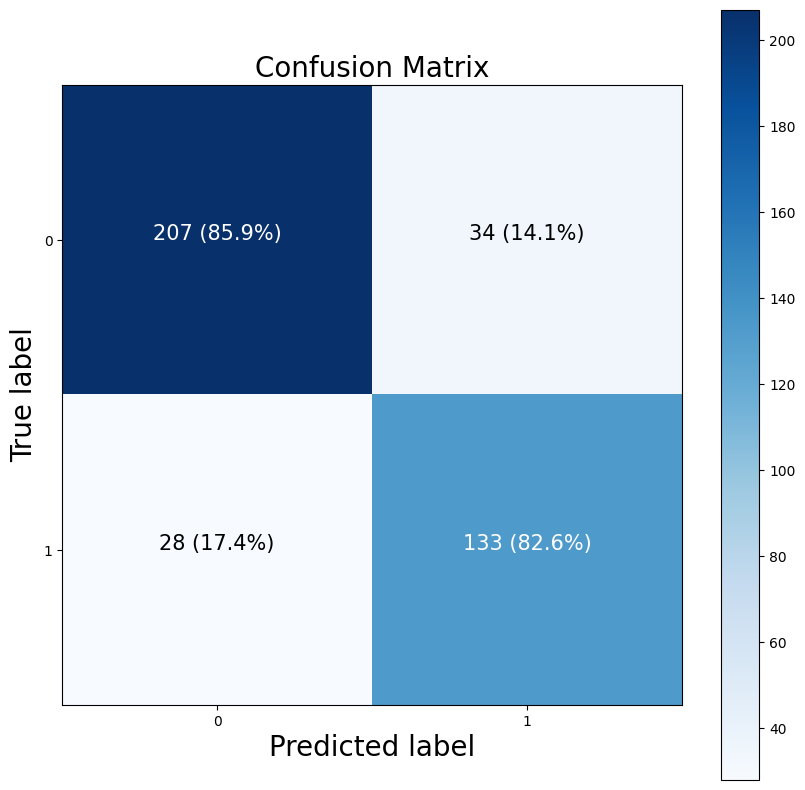

In [46]:
plot_confusion_matrix(y_train, y_pred_train_knn)

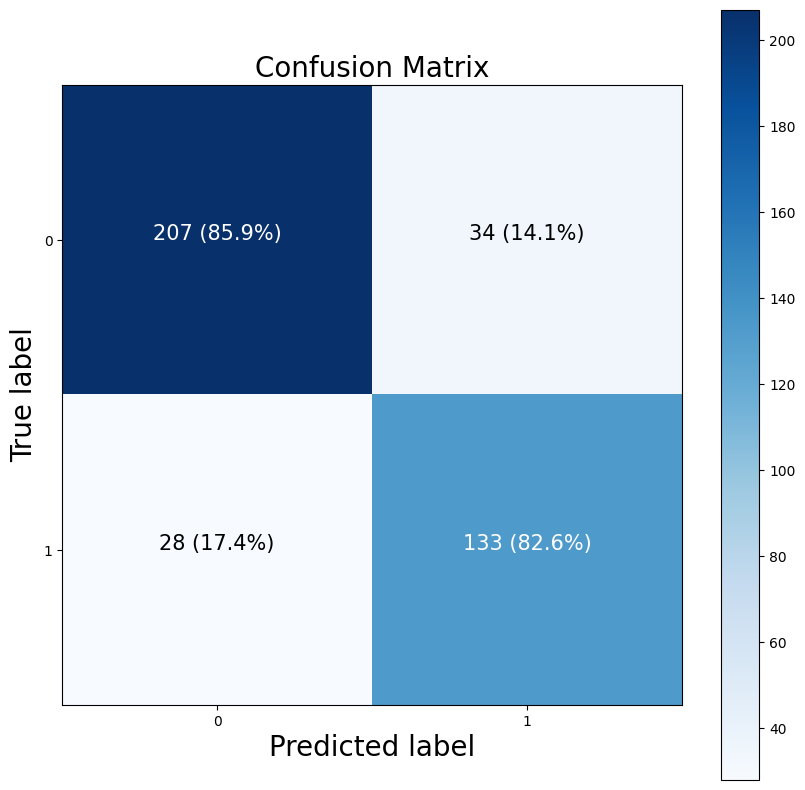

In [47]:
plot_confusion_matrix(y_train, y_pred_train_knn)

In [48]:
y_pred_test_knn = knn.predict(X_test)

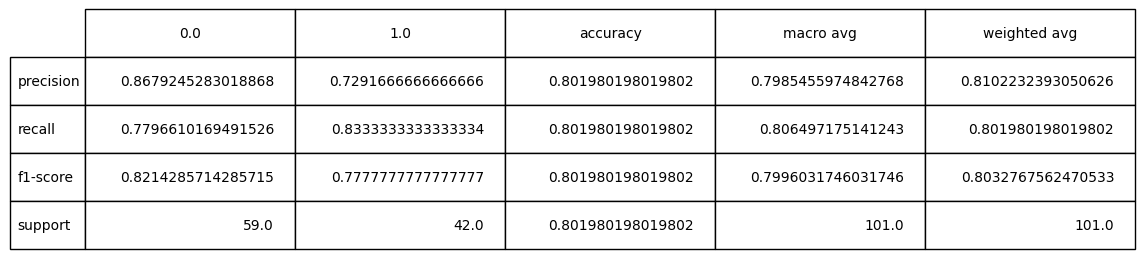

In [49]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_knn, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

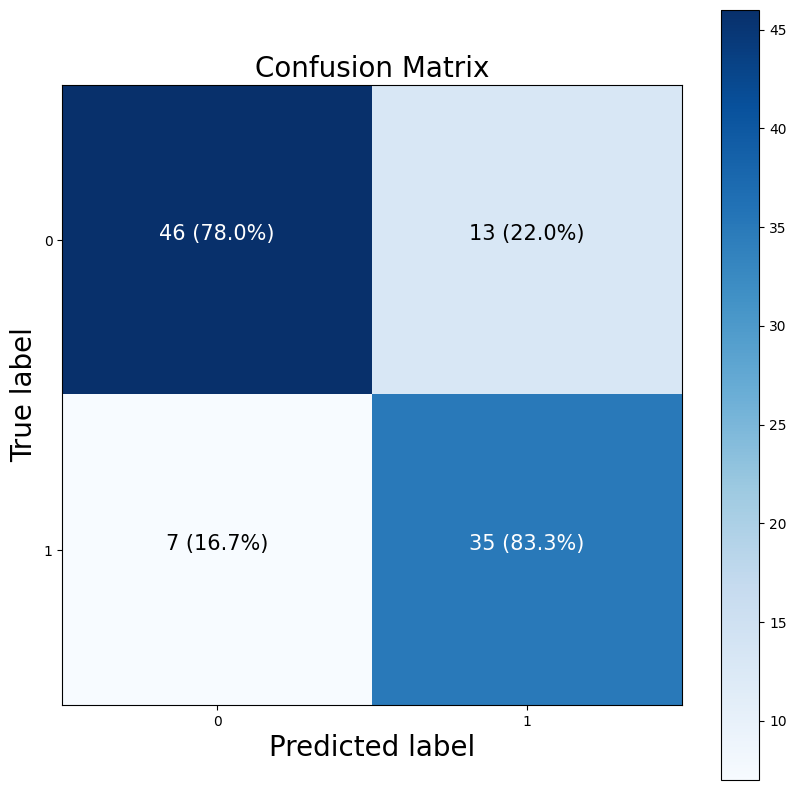

In [50]:
plot_confusion_matrix(y_test, y_pred_test_knn)

# Decision Tree Classifier:

In [51]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=406)

tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)

tree_cv.fit(X_train, y_train)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=406),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [52]:
tree_tuned = DecisionTreeClassifier(**tree_cv.best_params_, random_state = 406)
tree_tuned.fit(X_train, y_train)
y_pred_train_tree = tree_tuned.predict(X_train) 
y_pred_test_tree = tree_tuned.predict(X_test)

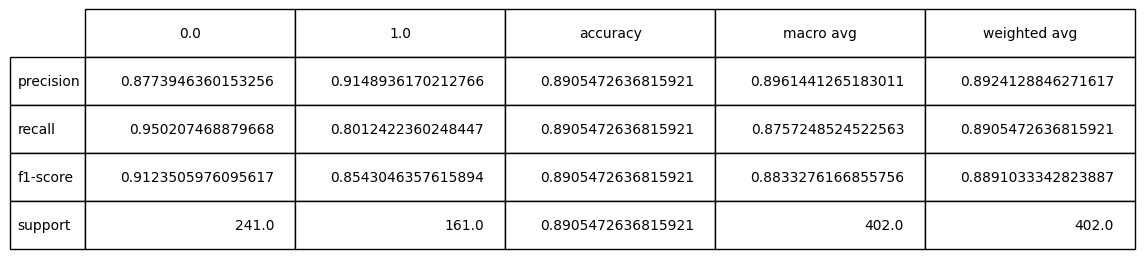

In [53]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

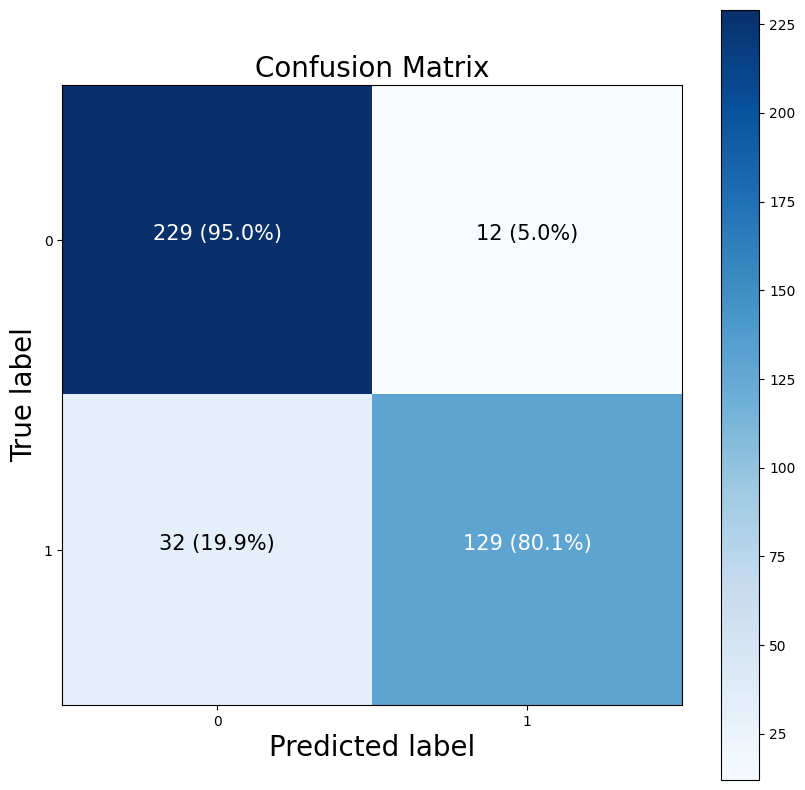

In [54]:
plot_confusion_matrix(y_train, y_pred_train_tree)

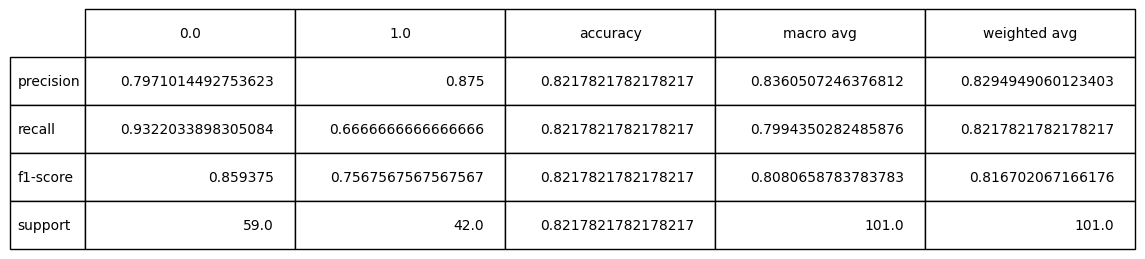

In [55]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

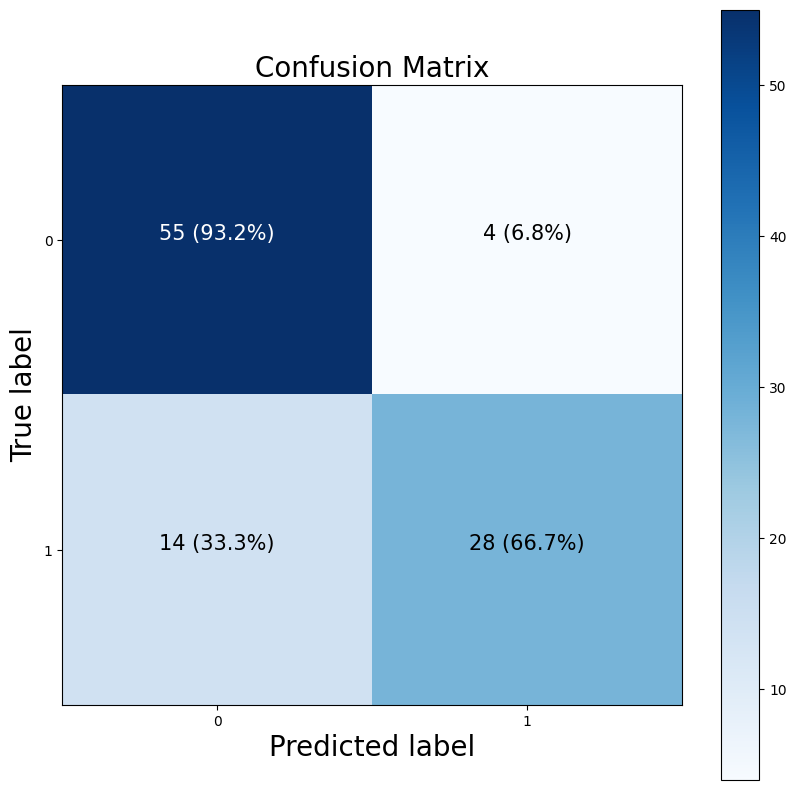

In [56]:
plot_confusion_matrix(y_test, y_pred_test_tree)

# Support Vector Machine:

In [57]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state= 113)

params = {"C":(0.1, 1, 10), 
          "gamma":(0.01, 0.1, 1), 
          "kernel":('linear', 'rbf')}               


svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
svm_cv.fit(X_train, y_train)
    

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(gamma=0.1, random_state=113), n_jobs=-1,
             param_grid={'C': (0.1, 1, 10), 'gamma': (0.01, 0.1, 1),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy', verbose=1)

In [58]:
svm_tuned = SVC(**svm_cv.best_params_, random_state=113)
svm_tuned.fit(X_train, y_train)
y_pred_train_svm = svm_tuned.predict(X_train) 
y_pred_test_svm = svm_tuned.predict(X_test)

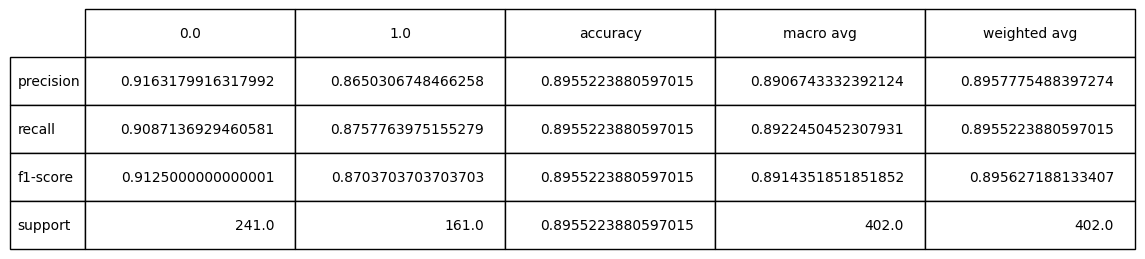

In [59]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_svm, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

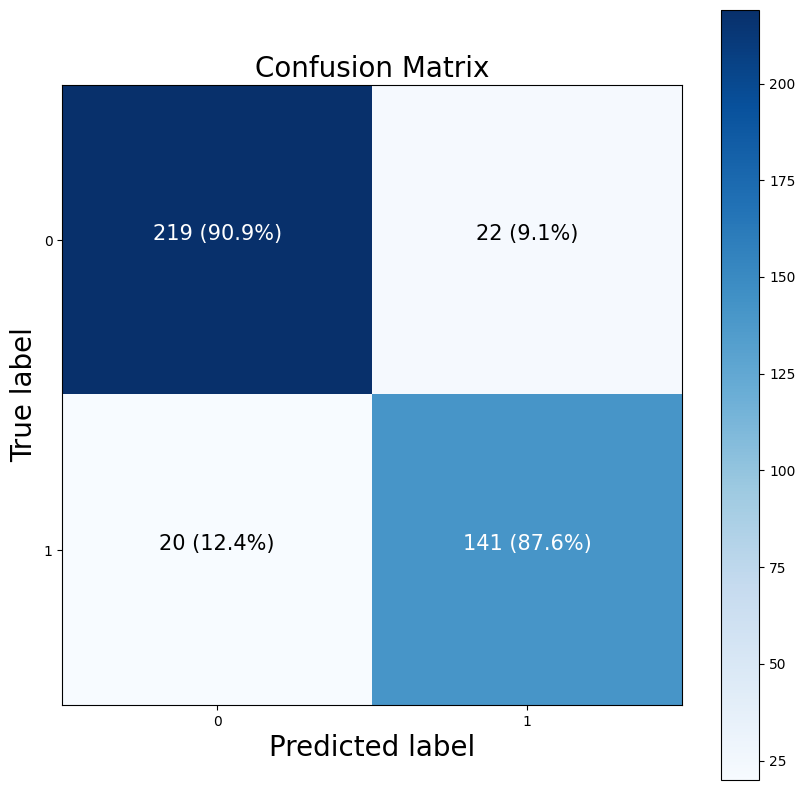

In [60]:
plot_confusion_matrix(y_train, y_pred_train_svm)

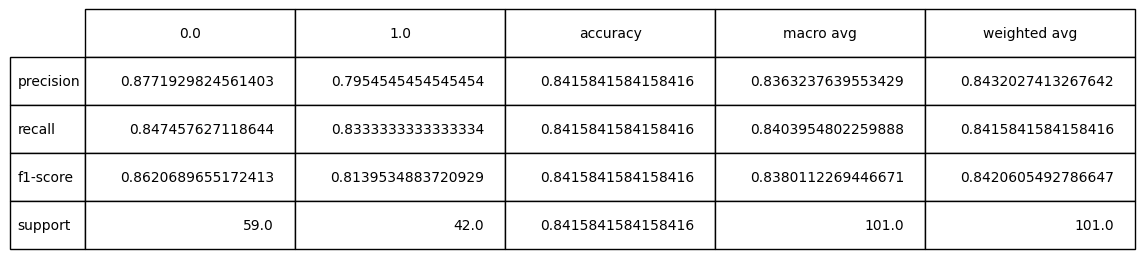

In [61]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_svm, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

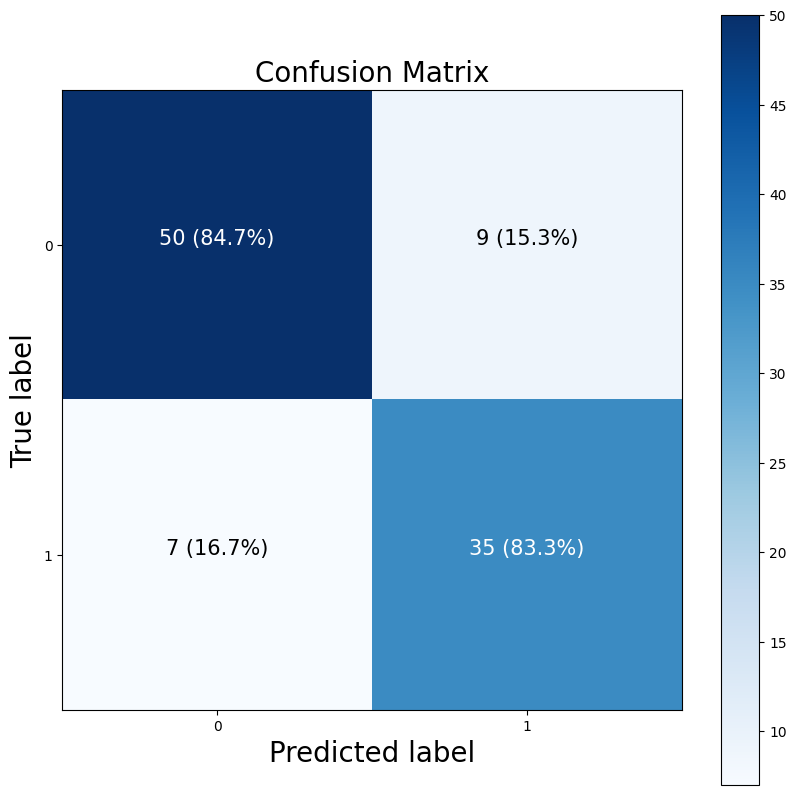

In [62]:
plot_confusion_matrix(y_test, y_pred_test_svm)

## Naive Bayes

In [63]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred_train_gnb = gnb.predict(X_train) 
y_pred_test_gnb = gnb.predict(X_test)

/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mansibezbaruah/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

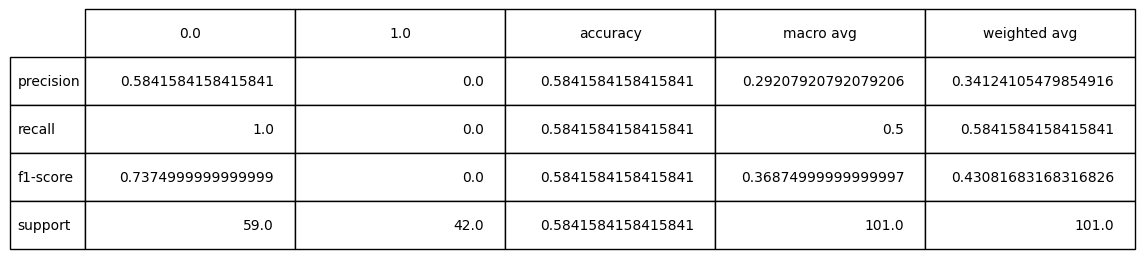

In [65]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_gnb, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

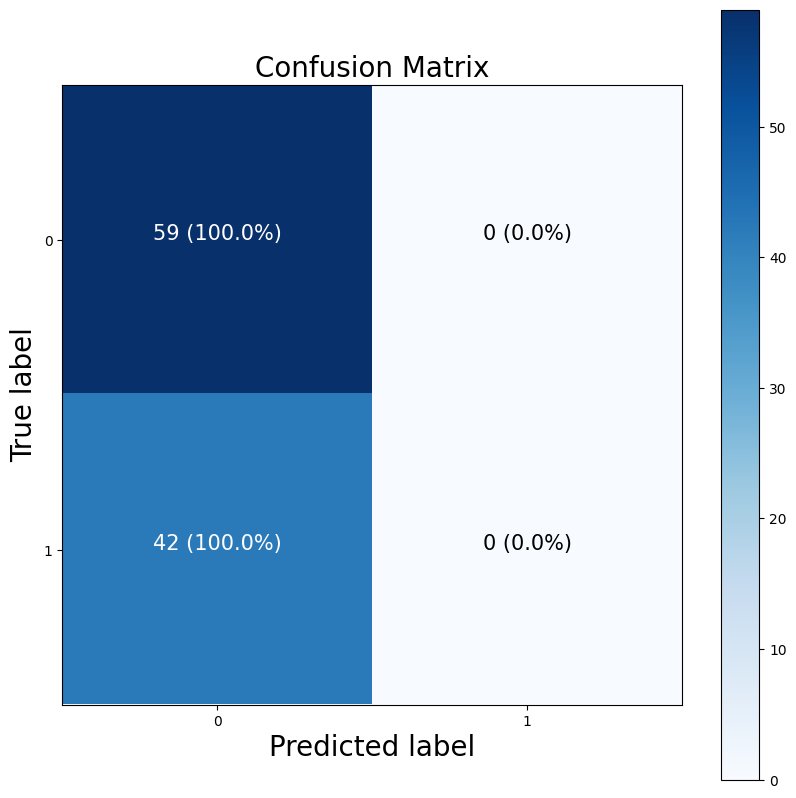

In [66]:
plot_confusion_matrix(y_test, y_pred_test_gnb)

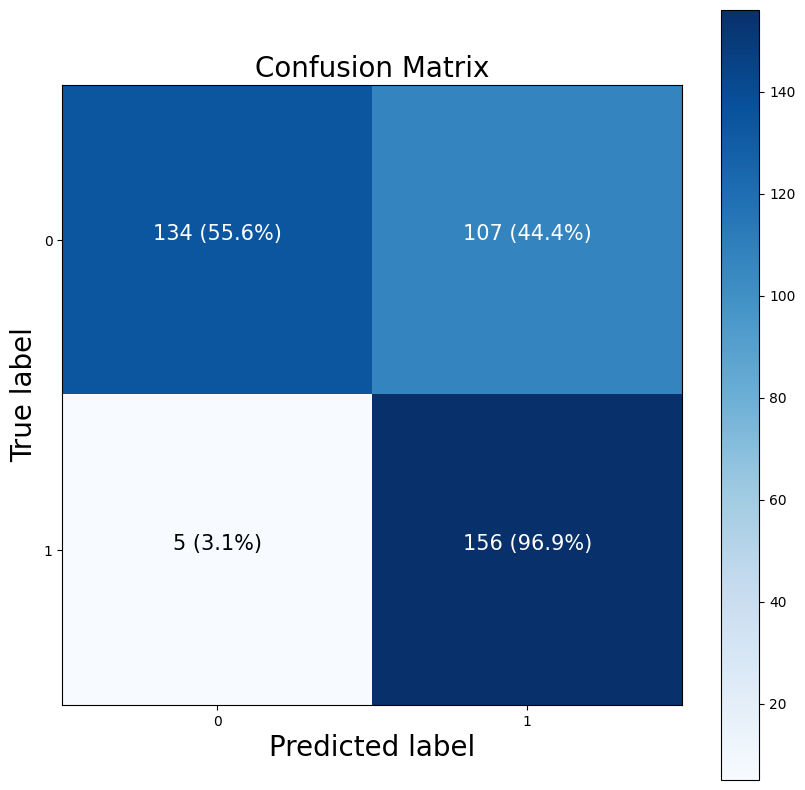

In [67]:
plot_confusion_matrix(y_train, y_pred_train_gnb)

TensorFlow

In [153]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
input_shape = [X_train.shape[1]]

In [154]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                448       
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',  
               
              # MAE error is good for
              # numerical predictions
              loss='mse')  

              
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_test, y_test),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256, 
                   epochs=15,  # total epoch
 
                   )

Epoch 1/15
2/2 [==============================] - 0s 50ms/step - loss: 4.7423 - val_loss: 0.9006
Epoch 2/15
2/2 [==============================] - 0s 10ms/step - loss: 1.8731 - val_loss: 8.3247
Epoch 3/15
2/2 [==============================] - 0s 11ms/step - loss: 8.6347 - val_loss: 1.1967
Epoch 4/15
2/2 [==============================] - 0s 9ms/step - loss: 1.0166 - val_loss: 2.8072
Epoch 5/15
2/2 [==============================] - 0s 11ms/step - loss: 4.1969 - val_loss: 3.4499
Epoch 6/15
2/2 [==============================] - 0s 9ms/step - loss: 3.2384 - val_loss: 0.1196
Epoch 7/15
2/2 [==============================] - 0s 9ms/step - loss: 0.3554 - val_loss: 2.2042
Epoch 8/15
2/2 [==============================] - 0s 11ms/step - loss: 2.8217 - val_loss: 1.8853
Epoch 9/15
2/2 [==============================] - 0s 10ms/step - loss: 1.6252 - val_loss: 0.1064
Epoch 10/15
2/2 [==============================] - 0s 10ms/step - loss: 0.3158 - val_loss: 1.3156
Epoch 11/15
2/2 [===============

In [176]:
y_pred_train_DL = model.predict(X_train) 
y_pred_test_DL = model.predict(X_test)

4/4 [==============================] - 0s 537us/step


In [181]:
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f' % error)

MSE: 0.145
